In [1]:
import pandas as pd

# Load the JSON file into a DataFrame
df = pd.read_json('hats_raw_1.json')

# Print the head of the DataFrame
print(df.head())

                                  id  \
0  ld1-1643398853934-1643398876931-0   
1  ld1-1643399486815-1643399517335-1   
2  ld1-1643399486815-1643399517360-0   
3  ld1-1643399486815-1643399517210-0   
4  ld1-1643399055209-1643399087031-0   

                                          title recordLink media  \
0                      hat worn by Minnie Fiske               []   
1  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
2  Model 1911; Hat, Montana Peak; Hat, Campaign               []   
3  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
4  Model 1911; Hat, Campaign; Hat, Montana Peak               []   

                                            freetext  \
0  {'creditLine': ['Gift of Olive Kooken'], 'date...   
1  {'notes': ['Currently not on view'], 'physical...   
2  {'notes': ['Currently not on view'], 'physical...   
3  {'notes': ['Currently not on view'], 'physical...   
4  {'notes': ['Currently not on view'], 'physical...   

             

In [2]:
# Extract keys from the 'freetext' column and create new columns
freetext_keys = ['creditLine', 'date', 'notes', 'physicalDescription']

for key in freetext_keys:
    df[key] = df['freetext'].apply(lambda x: x.get(key, [None])[0])

# Display the head of the updated DataFrame
print(df.head())

                                  id  \
0  ld1-1643398853934-1643398876931-0   
1  ld1-1643399486815-1643399517335-1   
2  ld1-1643399486815-1643399517360-0   
3  ld1-1643399486815-1643399517210-0   
4  ld1-1643399055209-1643399087031-0   

                                          title recordLink media  \
0                      hat worn by Minnie Fiske               []   
1  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
2  Model 1911; Hat, Montana Peak; Hat, Campaign               []   
3  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
4  Model 1911; Hat, Campaign; Hat, Montana Peak               []   

                                            freetext  \
0  {'creditLine': ['Gift of Olive Kooken'], 'date...   
1  {'notes': ['Currently not on view'], 'physical...   
2  {'notes': ['Currently not on view'], 'physical...   
3  {'notes': ['Currently not on view'], 'physical...   
4  {'notes': ['Currently not on view'], 'physical...   

             

In [3]:
# {'date': ['1860s'], 'object_type': ['Fire hats'], 'topic': ['Art', 'Animals', 'Fire Hats', 'Clothing and dress', 'Dress accessories', 'Birds', 'Eagles', 'Firefighting Collection', 'Fraternal Associations', 'Fire Fighting']}
indexed_keys = ['date', 'object_type', 'topic']

for key in indexed_keys:
    df[key] = df['indexedStructured'].apply(lambda x: x.get(key, [None])[0] if x.get(key) else None)

# Display the head of the updated DataFrame
print(df.head())

                                  id  \
0  ld1-1643398853934-1643398876931-0   
1  ld1-1643399486815-1643399517335-1   
2  ld1-1643399486815-1643399517360-0   
3  ld1-1643399486815-1643399517210-0   
4  ld1-1643399055209-1643399087031-0   

                                          title recordLink media  \
0                      hat worn by Minnie Fiske               []   
1  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
2  Model 1911; Hat, Montana Peak; Hat, Campaign               []   
3  Model 1911; Hat, Campaign; Hat, Montana Peak               []   
4  Model 1911; Hat, Campaign; Hat, Montana Peak               []   

                                            freetext  \
0  {'creditLine': ['Gift of Olive Kooken'], 'date...   
1  {'notes': ['Currently not on view'], 'physical...   
2  {'notes': ['Currently not on view'], 'physical...   
3  {'notes': ['Currently not on view'], 'physical...   
4  {'notes': ['Currently not on view'], 'physical...   

             

In [4]:
# Filter out rows where 'media' is missing or contains only empty lists
df_imgs = df[df['media'].apply(lambda x: len(x) > 0)]

# Display the head of the new DataFrame
print(df_imgs.head())

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                             freetext  \
29  {'creditLine': ['Gift of CIGNA Museum and Art ...   
44  {'creditLine': ['Gift 

In [5]:
# Filter rows where 'object_type' contains "hat" (case insensitive)
df_hats = df[(df['object_type'].str.contains('hat|cap', case=False, na=False)) & (df['media'].apply(lambda x: len(x) > 0))]

# Display the head of the new DataFrame
print(df_hats.head())

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                             freetext  \
29  {'creditLine': ['Gift of CIGNA Museum and Art ...   
44  {'creditLine': ['Gift 

In [6]:
df_hats.to_csv('df_hats.csv', index=False)

In [7]:
df_hats_2 = df_hats.copy()

# Display the head of the new DataFrame
print(df_hats_2.head())

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                             freetext  \
29  {'creditLine': ['Gift of CIGNA Museum and Art ...   
44  {'creditLine': ['Gift 

In [8]:
hats_df_funFor = pd.read_csv('df_hats_with_scores.csv')

# Display the head of the new DataFrame
print(hats_df_funFor.head())

                                  id                             title  \
0  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
1  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
2  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
3  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
4  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

  recordLink                                              media  \
0        NaN  ['https://ids.si.edu/ids/deliveryService?id=NM...   
1        NaN  ['https://ids.si.edu/ids/deliveryService?id=NM...   
2        NaN  ['https://ids.si.edu/ids/deliveryService?id=NM...   
3        NaN  ['https://ids.si.edu/ids/deliveryService?id=NM...   
4        NaN  ['https://ids.si.edu/ids/deliveryService?id=NM...   

                                            freetext  \
0  {'creditLine': ['Gift of CIGNA Museum and Art ...   
1  {'creditLine': ['Gift of CIGNA Museum

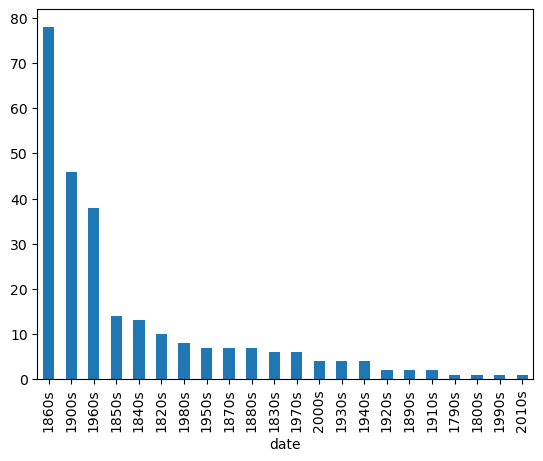

In [9]:
# number of distinct values and their aggregate counts in column 'date' in df_hats
date_counts = df_hats['date'].value_counts()
# print(date_counts)

# visualize date_counts
import matplotlib.pyplot as plt
date_counts.plot(kind='bar')
plt.show()


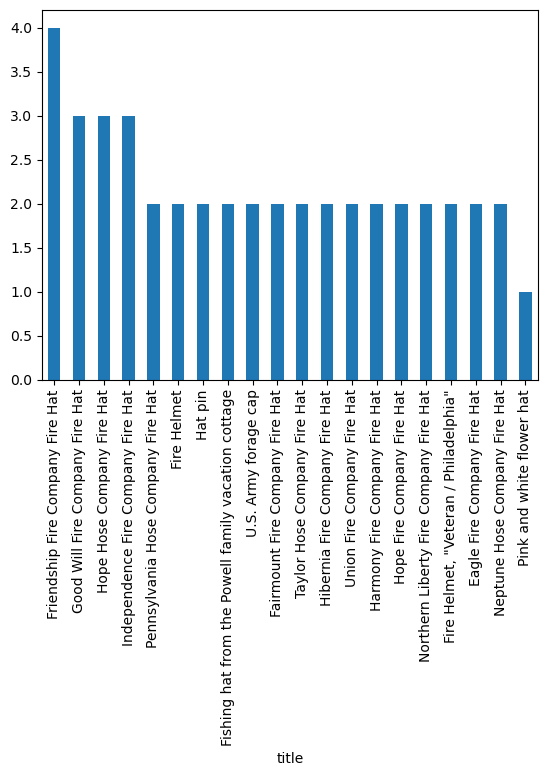

In [10]:
# number of distinct values and their aggregate counts in column 'physicalDescription' in df_hats
top_20_topic_counts = df_hats['title'].value_counts().head(20)
# print(top_10_topic_counts)

# visualize top_10_topic_counts
top_20_topic_counts.plot(kind='bar')
plt.show()

In [11]:
# import pandas as pd
# import openai
# from openai import OpenAI

# client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))
# import time
# import os
# import random

# # Load the CSV file
# df = pd.read_csv('df_hats.csv')

# # Set up your OpenAI API key
# # It's safer to use environment variables for your API key

# # Function to generate the prompt for each row
# def generate_prompt(row):
#     # Handle missing data
#     title = row.get('title', '')
#     physical_description = row.get('physicalDescription', '')
#     object_type = row.get('objectType', '')
#     topic = row.get('topic', '')
#     notes = row.get('notes', '')

#     prompt = f"""
# Analyze the following hat information and assign a numerical score between 0.00 and 1.00 indicating how decorative (ornamental, artistic, aesthetically pleasing) or functional (used in business or work, utilitarian) the hat is. A score of 1.00 means the hat is purely decorative, 0.00 means it is purely functional, and scores in between represent the degree to which it is decorative. Provide only the numerical score as output.

# Title: "{title}"
# Physical Description: "{physical_description}"
# Object Type: "{object_type}"
# Topic: "{topic}"
# Notes: "{notes}"

# Score:"""
#     return prompt.strip()

# # Function to call OpenAI API and get the score
# def get_score(prompt):
#     retries = 5
#     for i in range(retries):
#         try:
#             response = client.chat.completions.create(model="gpt-3.5-turbo",
#             messages=[
#                 {"role": "system", "content": "You are an expert at determining the functional or aesthetic value of a hat based only on its textual description."},
#                 {"role": "user", "content": prompt},
#             ],
#             max_tokens=5,
#             temperature=0)
#             # Extract score from response
#             score_text = response.choices[0].message.content.strip()
#             score = float(score_text)
#             return score
#         except openai.RateLimitError as e:
#             sleep_time = (2 ** i) + random.uniform(0, 1)
#             print(f"Rate limit exceeded. Retrying in {sleep_time:.2f} seconds...")
#             time.sleep(sleep_time)
#         except Exception as e:
#             print(f"Error: {e}")
#             return None
#     return None

# # Initialize an empty list to store the scores
# scores = []

# # Loop over the DataFrame rows
# for index, row in df.iterrows():
#     prompt = generate_prompt(row)
#     score = get_score(prompt)
#     scores.append(score)
#     time.sleep(0.1)  # Adjust delay as needed

# # Add the scores to the DataFrame
# df['decorative_functional_score'] = scores

# # Save the new DataFrame to a CSV
# df.to_csv('output_with_scores.csv', index=False)

In [12]:
# Drop the 'indexedStructured' and 'freetext' columns
df_hats_clean1 = df_hats.drop(columns=['indexedStructured', 'freetext'])

# Display the head of the new DataFrame
print(df_hats_clean1.head())

# Export the DataFrame to a CSV file
df_hats_clean1.to_csv('df_hats_clean1.csv', index=False)

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                 creditLine   date  \
29  Gift of CIGNA Museum and Art Collection  1860s   
44  Gift of CIGNA Museum and Art

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import nltk
# Uncomment the lines below if you need to download NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import nltk

# Download NLTK data resources
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the DataFrame
df = pd.read_csv('df_hats_clean1.csv')  # Adjust the file path as needed

# Display the DataFrame columns
print("Columns in DataFrame:")
print(df.columns)

# Assuming the text data is in a column called 'notes'
# Replace 'notes' with the correct column if different

# Preprocess and tokenize the text data
def preprocess_text(text):
    # Handle NaN values
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the text column
df['processed_text'] = df['notes'].astype(str).apply(preprocess_text)

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Use NearestNeighbors to find similar items
n_neighbors = 5  # Number of neighbors to find
nn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

# Example: Find nearest neighbors for a specific item
item_index = 0  # Change this index to explore other items

print(f"\nItem {item_index} notes:")
print(df.iloc[item_index]['notes'])
print("\nNearest neighbors:")

for idx in indices[item_index][1:]:  # Skip the first one (it's the item itself)
    print(f"Index {idx}:")
    print(df.iloc[idx]['notes'])
    print("---")

# Optional: Perform K-Means clustering
num_clusters = 5  # Adjust based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Analyze clusters
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    cluster_df = df[df['cluster'] == i]
    print(cluster_df['notes'].head(5))  # Show first 5 items in the cluster
    print("------")

Columns in DataFrame:
Index(['id', 'title', 'recordLink', 'media', 'creditLine', 'date', 'notes',
       'physicalDescription', 'object_type', 'topic'],
      dtype='object')

Item 0 notes:
Beginning in the late 18th century, some volunteer fire fighters began to wear hats painted with their company’s name to identify themselves at chaotic fire scenes. During the 19th century, these fire hats became more ornate, as portraits of historical figures, patriotic scenes, allegorical images, or company icons were painted alongside the company’s name, motto, or founding date. Made of pressed felt, these “stove-pipe” hats were primarily used in Philadelphia, but other nearby cities such as Baltimore and Washington adopted them as well. Fire hats were personal items with the owner’s initials often painted on the top of the hat. While these hats were worn at fires, they are more colloquially known as “parade hats.” Fire companies commonly marched in the many parades of the period and these ornate

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joshstrupp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshstrupp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


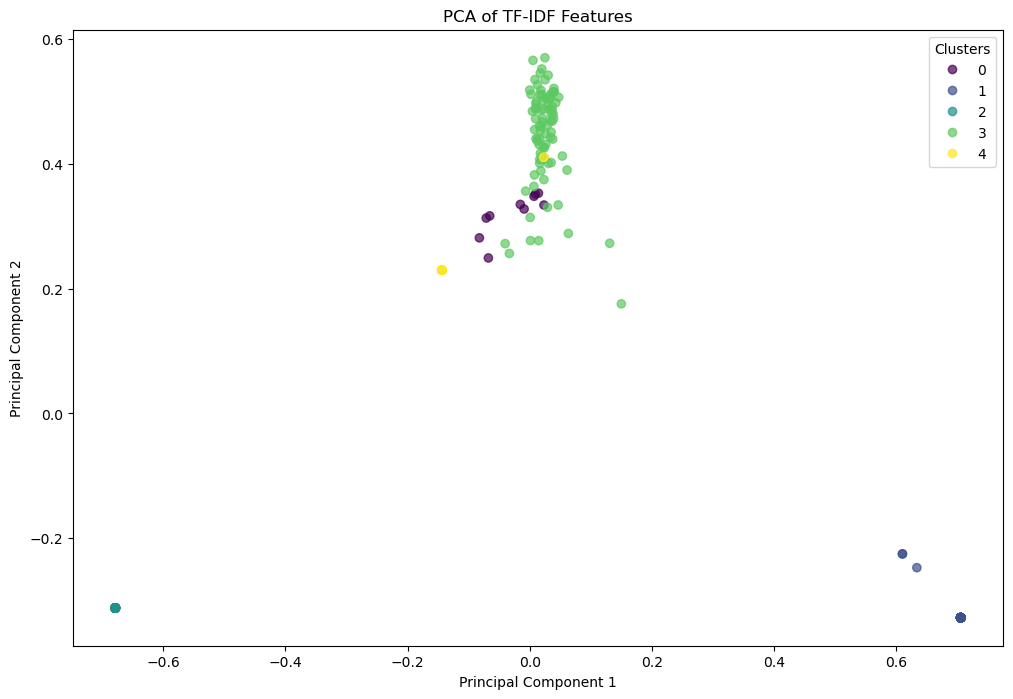

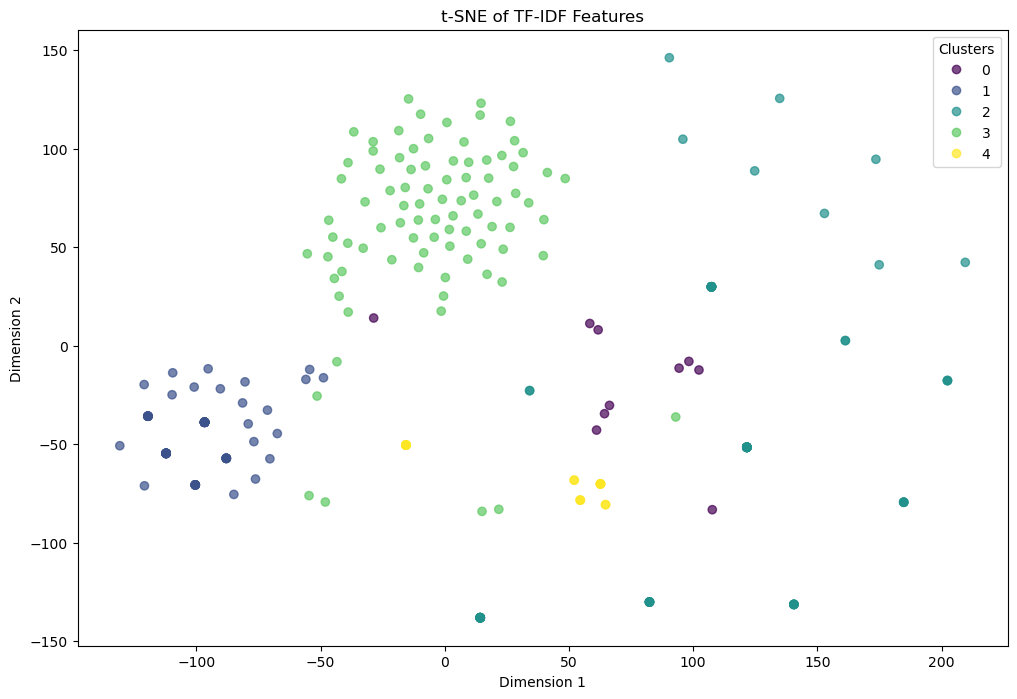

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming you've already performed clustering and have 'df' and 'X'

# Option 1: PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

df_pca = pd.DataFrame()
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]
df_pca['cluster'] = df['cluster']

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Option 2: t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

df_tsne = pd.DataFrame()
df_tsne['Dim1'] = X_tsne[:, 0]
df_tsne['Dim2'] = X_tsne[:, 1]
df_tsne['cluster'] = df['cluster']

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['Dim1'], df_tsne['Dim2'], c=df_tsne['cluster'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('t-SNE of TF-IDF Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [16]:
# Get the feature names (words) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Get the order of terms in each cluster centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Number of top terms to display
top_n = 10

for i in range(num_clusters):
    print(f"\nCluster {i} top {top_n} terms:")
    top_terms = [terms[ind] for ind in order_centroids[i, :top_n]]
    print(", ".join(top_terms))

    # Optionally, print sample items from the cluster
    print(f"\nSample items from Cluster {i}:")
    cluster_df = df[df['cluster'] == i]
    print(cluster_df['notes'].head(3))  # Adjust 'notes' to your text column
    print("------")


Cluster 0 top 10 terms:
engine, hat, payne, gold, company, forest, steam, national, established, fire

Sample items from Cluster 0:
33    A profusion of flowers adorns this wide-brimme...
76    This fire hat dates to the middle of the 19th ...
79    This fire hat was used in Philadelphia, Pennsy...
Name: notes, dtype: object
------

Cluster 1 top 10 terms:
helmet, rear, brim, city, firefighter, gratacap, frontpiece, york, new, leather

Sample items from Cluster 1:
111    The traditional American leather firefighter’s...
112    The traditional American leather firefighter’s...
113    The traditional American leather firefighter’s...
Name: notes, dtype: object
------

Cluster 2 top 10 terms:
hats, company, fire, painted, ornate, name, well, scenes, often, century

Sample items from Cluster 2:
0    Beginning in the late 18th century, some volun...
1    Beginning in the late 18th century, some volun...
2    Beginning in the late 18th century, some volun...
Name: notes, dtype: object
-----

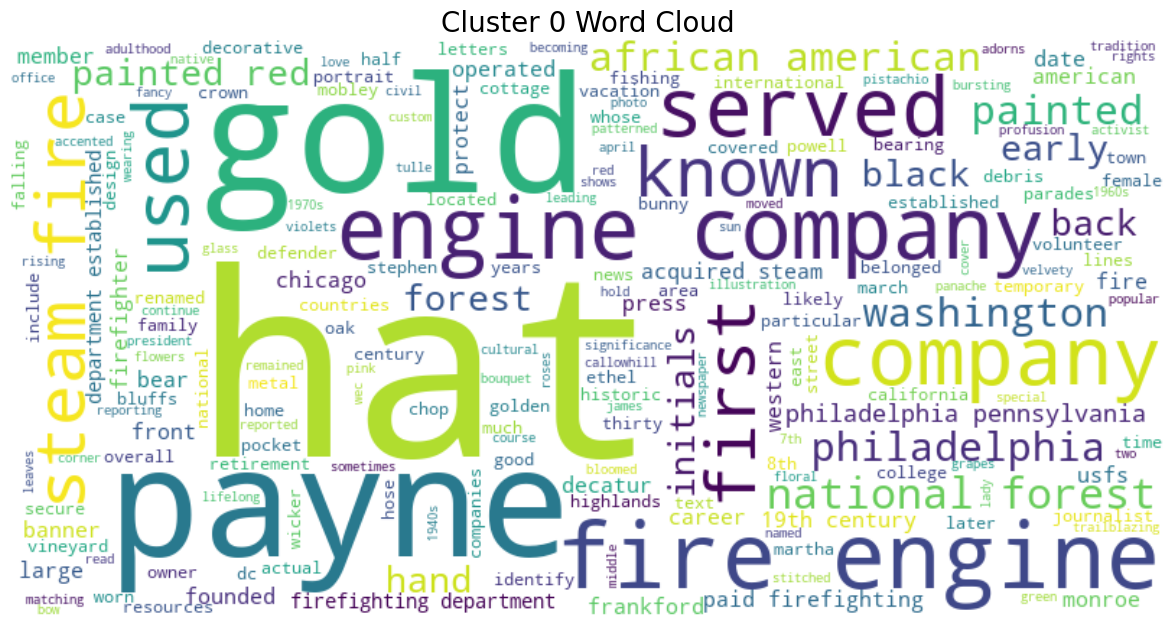

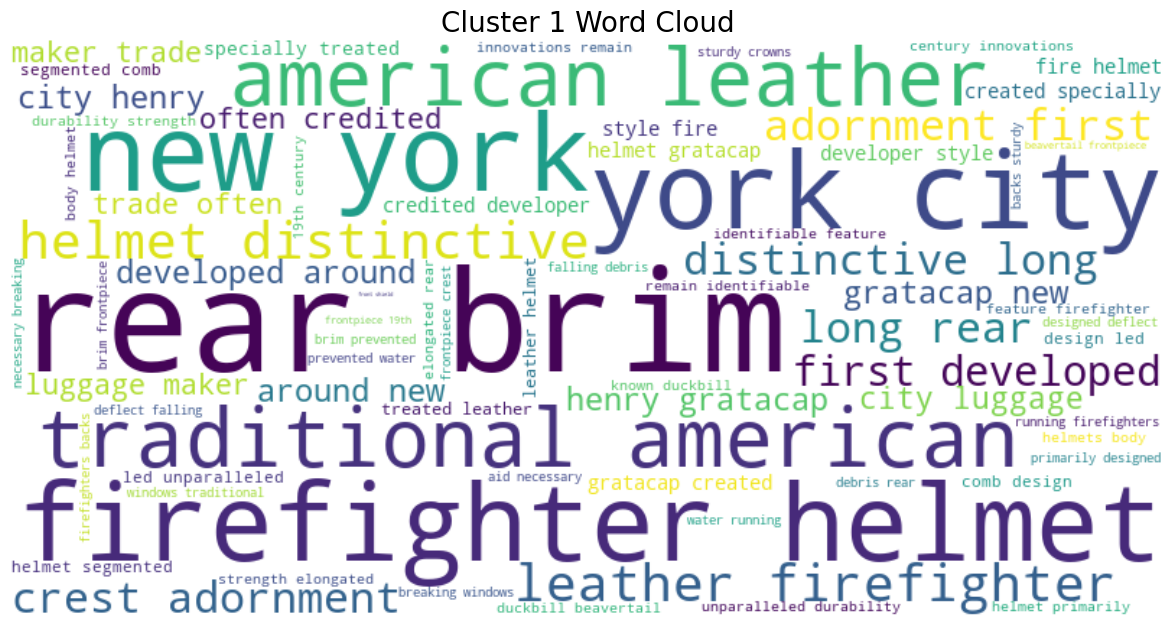

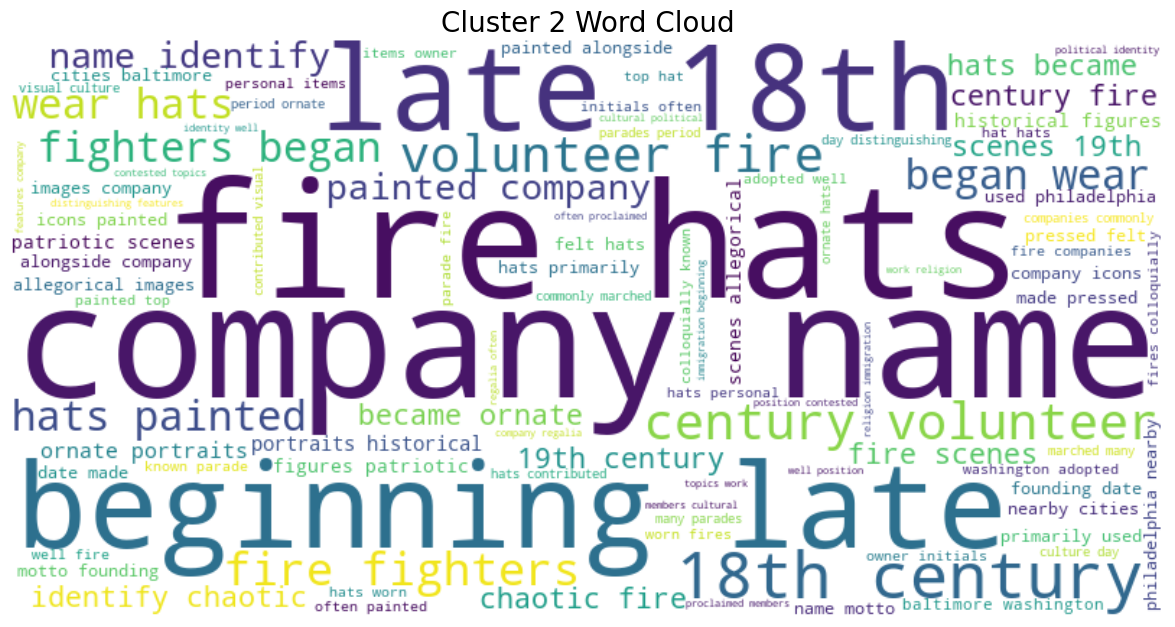

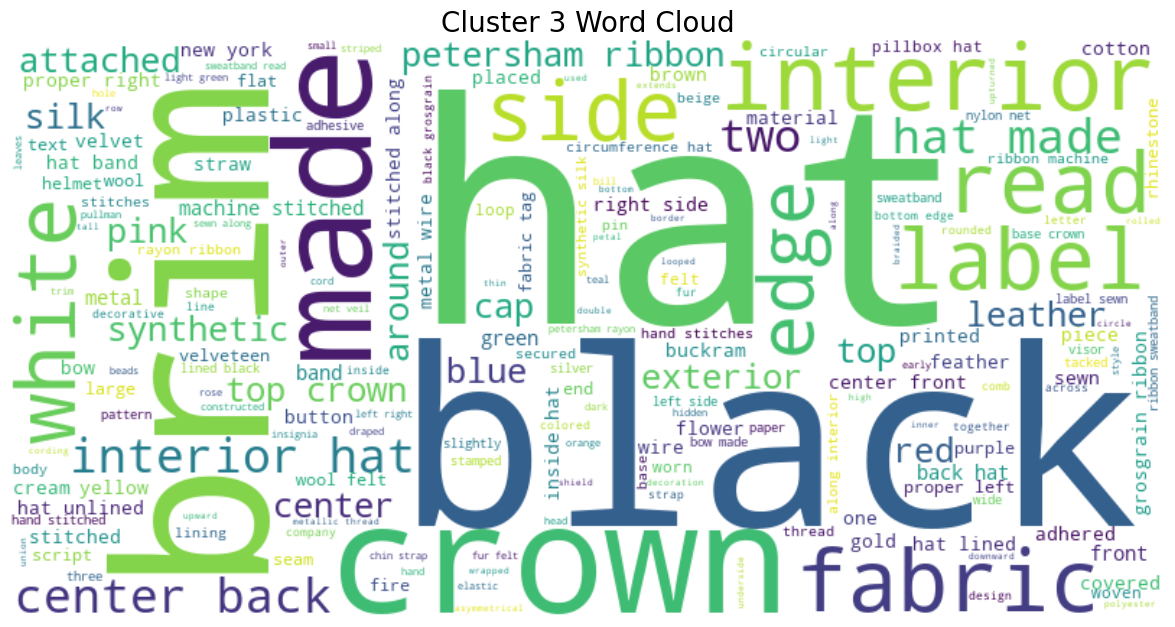

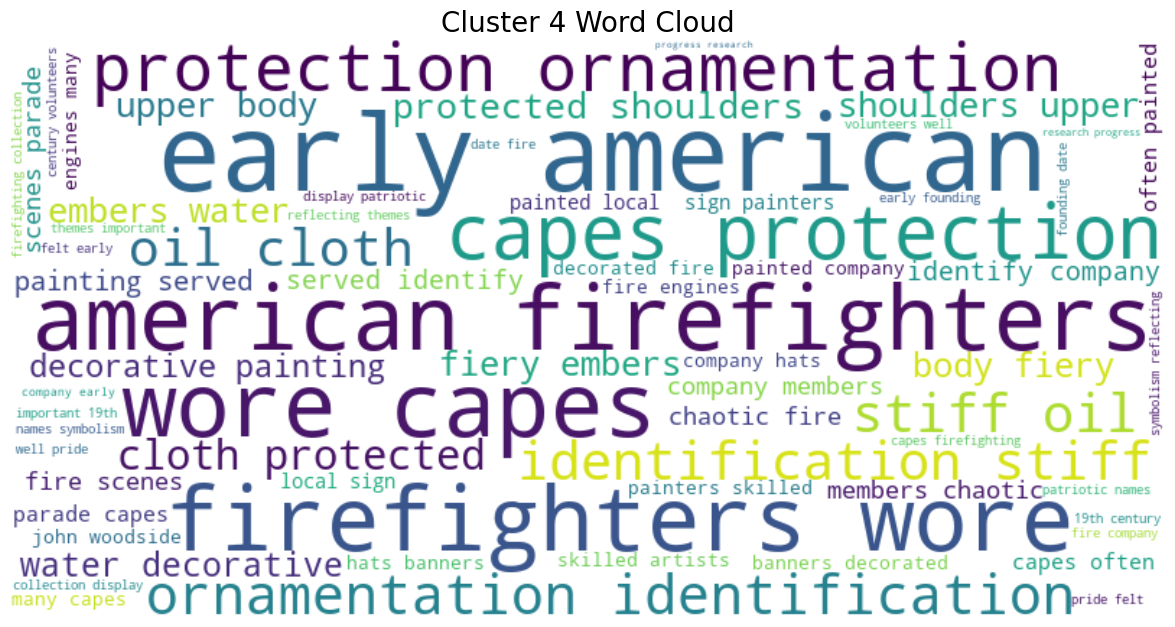

In [17]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(num_clusters):
    # Combine all processed text from items in the cluster
    cluster_text = df[df['cluster'] == i]['processed_text'].str.cat(sep=' ')
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Display the word cloud
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} Word Cloud', fontsize=20)
    plt.show()

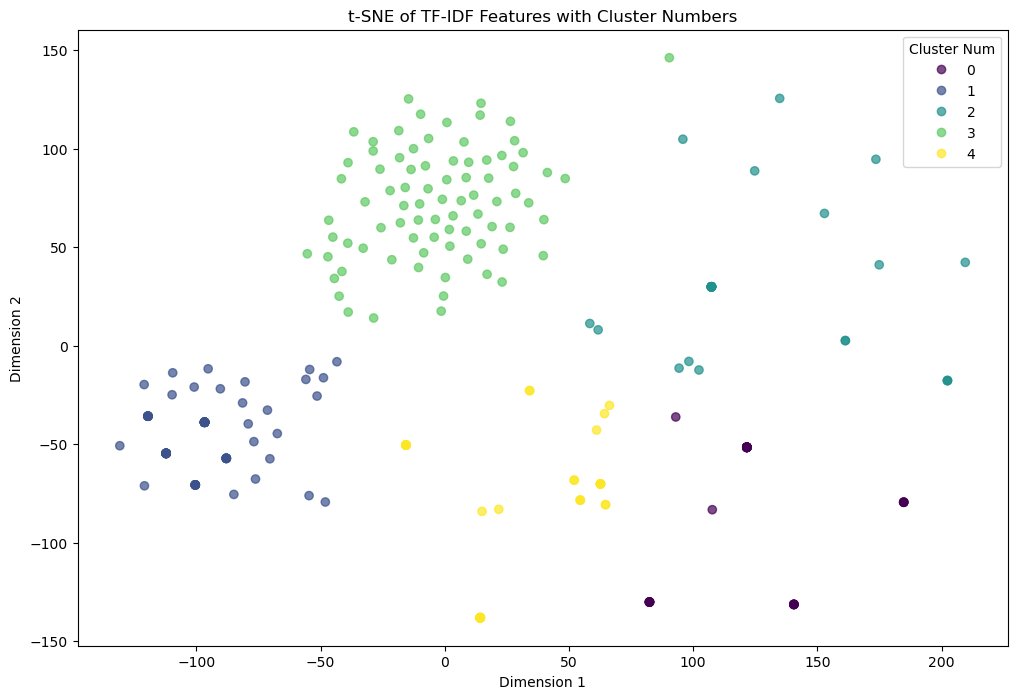

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you've already preprocessed your text and have df_hats_clean1

# Load your DataFrame (if not already loaded)
# df_hats_clean1 = pd.read_csv('df_hats_clean1.csv')

# Preprocess and tokenize the text data (if not already done)
def preprocess_text(text):
    # Handle NaN values
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the text column
df_hats_clean1['processed_text'] = df_hats_clean1['notes'].astype(str).apply(preprocess_text)

# Convert text data into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_hats_clean1['processed_text'])

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame()
df_tsne['Dim1'] = X_tsne[:, 0]
df_tsne['Dim2'] = X_tsne[:, 1]

# Perform K-Means clustering on t-SNE dimensions
num_clusters_tsne = 5  # Adjust as needed
kmeans_tsne = KMeans(n_clusters=num_clusters_tsne, random_state=42)
kmeans_tsne.fit(df_tsne[['Dim1', 'Dim2']])

# Add cluster labels to df_tsne
df_tsne['cluster_num'] = kmeans_tsne.labels_

# Add the cluster numbers to your original DataFrame
df_hats_clean1['cluster_num'] = df_tsne['cluster_num']

# Visualize the clusters on the t-SNE plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['Dim1'], df_tsne['Dim2'], c=df_tsne['cluster_num'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Cluster Num")
plt.title('t-SNE of TF-IDF Features with Cluster Numbers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [19]:
df_hats_clean1 = df_hats_clean1.drop(columns=['cluster_num'])

# Display the head of the updated DataFrame
print(df_hats_clean1.head())

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                 creditLine   date  \
29  Gift of CIGNA Museum and Art Collection  1860s   
44  Gift of CIGNA Museum and Art

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Assuming df_hats_clean1 is your DataFrame
# Merge the specified columns into a single string for each row
cols_to_merge = ['title', 'notes', 'physicalDescription', 'object_type', 'topic']
df_hats_clean1[cols_to_merge] = df_hats_clean1[cols_to_merge].fillna('')
df_hats_clean1['merged_text'] = df_hats_clean1[cols_to_merge].agg(' '.join, axis=1)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_hats_clean1['merged_text'])

# Perform clustering using KMeans
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_hats_clean1['cluster_num'] = kmeans.fit_predict(X)

# Calculate the distance of each point to its assigned cluster centroid
distances = kmeans.transform(X)
assigned_clusters = df_hats_clean1['cluster_num'].values
assigned_distances = distances[np.arange(len(distances)), assigned_clusters]

# Add the distances as a new column with values rounded to two decimal places
df_hats_clean1['cluster_score'] = np.round(assigned_distances, 2)

# Display the DataFrame with the new columns
print(df_hats_clean1[['merged_text', 'cluster_num', 'cluster_score']])

                                             merged_text  cluster_num  \
29     Good Will Fire Company Fire Hat Beginning in t...            2   
44     Junior Fire Company Fire Hat Beginning in the ...            2   
52     Schuylkill Hose Company Fire Hat Beginning in ...            2   
53     L.G. Fire Hat Beginning in the late 18th centu...            2   
54     Norristown Hose Company Fire Hat Beginning in ...            2   
...                                                  ...          ...   
11484  Fire Helmet, "2nd Assistant Engineer C.C.F.D."...            1   
11485  Fire Helmet, "Asst. Chief D.S.F." The traditio...            1   
11490  Fire Helmet, "Gen Grant / 1 / HFD" The traditi...            1   
11491  Fire Helmet, "Assistant Chief" The traditional...            1   
11492  Fire Helmet, "Hancock" The traditional America...            1   

       cluster_score  
29              0.19  
44              0.24  
52              0.25  
53              0.28  
54      

In [21]:
<!-- It looks like you might have accidentally deleted some important information from your Jupyter Notebook. If you haven't saved the notebook after the deletion, you can try to revert to the last saved version by refreshing the browser or reopening the notebook.

If you have saved the notebook after the deletion, you can try the following steps to recover the lost information:

1. **Check the Jupyter Notebook checkpoints:**
    Jupyter Notebooks automatically save checkpoints. You can revert to a previous checkpoint by going to `File` > `Revert to Checkpoint` and selecting the most recent checkpoint.

2. **Check the Jupyter Notebook autosave files:**
    Jupyter Notebooks also create autosave files. These files are usually hidden and have a `.ipynb_checkpoints` extension. You can find them in the same directory as your notebook. You can open these files to recover your work.

3. **Check your version control system:**
    If you are using a version control system like Git, you can revert to a previous commit to recover your work.

4. **Check your browser cache:**
    Sometimes, the browser cache might still have the previous state of the notebook. You can try to recover it by checking the browser history or cache.

If none of these methods work, you might need to manually re-enter the lost information. If you provide more details about what was deleted, I can help you recreate the missing parts. -->

SyntaxError: unterminated string literal (detected at line 1) (1846472937.py, line 1)

In [22]:
print(df_hats_clean1.head())

                                   id                             title  \
29  ld1-1643399134763-1643399189210-0   Good Will Fire Company Fire Hat   
44  ld1-1643399134763-1643399189191-0      Junior Fire Company Fire Hat   
52  ld1-1643399134763-1643399189215-0  Schuylkill Hose Company Fire Hat   
53  ld1-1643399134763-1643399189250-0                     L.G. Fire Hat   
54  ld1-1643399134763-1643399189200-0  Norristown Hose Company Fire Hat   

   recordLink                                              media  \
29             [https://ids.si.edu/ids/deliveryService?id=NMA...   
44             [https://ids.si.edu/ids/deliveryService?id=NMA...   
52             [https://ids.si.edu/ids/deliveryService?id=NMA...   
53             [https://ids.si.edu/ids/deliveryService?id=NMA...   
54             [https://ids.si.edu/ids/deliveryService?id=NMA...   

                                 creditLine   date  \
29  Gift of CIGNA Museum and Art Collection  1860s   
44  Gift of CIGNA Museum and Art

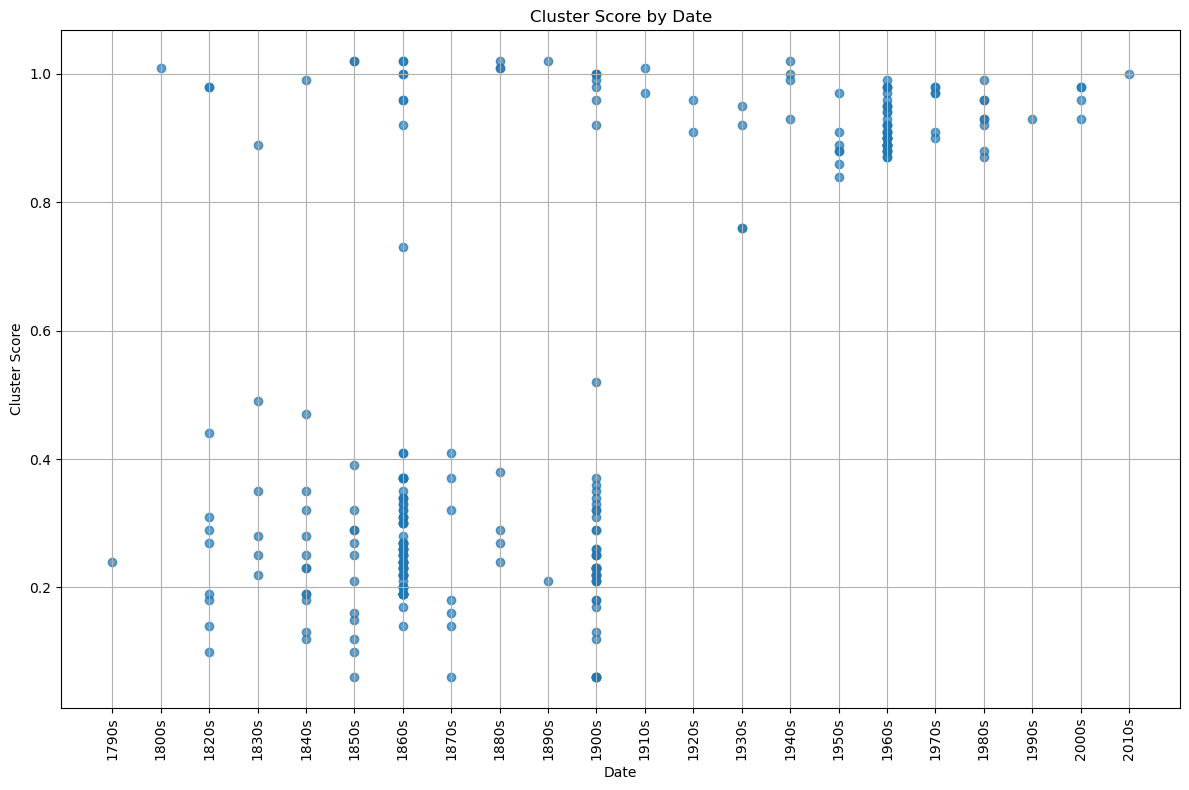

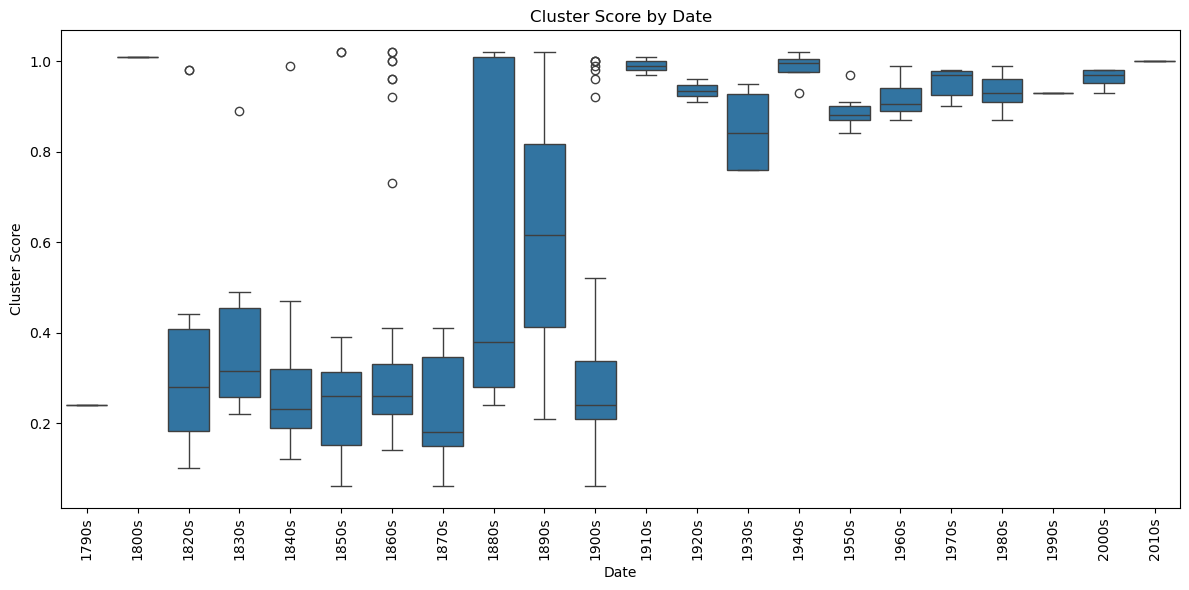

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Exclude rows with missing 'date' and 'cluster_score'
df_plot = df_hats_clean1.dropna(subset=['date', 'cluster_score']).copy()

# Step 1: Extract numeric years from 'date' strings
def extract_year(date_str):
    """
    Extracts a representative year from a date string.
    Handles formats like '1860s', '1840-1850', 'circa 1900', etc.
    """
    # Remove non-numeric characters except for hyphens
    cleaned_str = re.sub(r'[^0-9\-]', '', date_str)
    
    # If there's a range (e.g., '1840-1850'), take the average year
    if '-' in cleaned_str:
        years = cleaned_str.split('-')
        years = [int(y) for y in years if y.isdigit()]
        if years:
            return sum(years) / len(years)
    else:
        # Extract the numeric part
        match = re.search(r'(\d{3,4})', cleaned_str)
        if match:
            year = int(match.group(1))
            # Adjust for decades (e.g., '1860s' -> 1860)
            if len(str(year)) == 3:
                year *= 10
            return year
    return np.nan

df_plot['year'] = df_plot['date'].apply(extract_year)

# Drop rows where 'year' could not be extracted
df_plot = df_plot.dropna(subset=['year'])

# Convert 'year' to integer for sorting
df_plot['year'] = df_plot['year'].astype(int)

# Step 2: Sort the DataFrame by 'year'
df_plot = df_plot.sort_values('year')

# Step 3: Get the unique 'date' values in the order of 'year'
unique_dates = df_plot[['date', 'year']].drop_duplicates().sort_values('year')['date'].tolist()

# Step 4: Create a mapping from date to a numerical value
date_to_num = {date: idx for idx, date in enumerate(unique_dates)}

# Map the dates in the DataFrame to their corresponding numerical values
df_plot['date_num'] = df_plot['date'].map(date_to_num)

# Step 5: Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(df_plot['date_num'], df_plot['cluster_score'], alpha=0.7)

# Set x-axis ticks and labels
plt.xticks(ticks=range(len(unique_dates)), labels=unique_dates, rotation=90)
plt.xlabel('Date')
plt.ylabel('Cluster Score')
plt.title('Cluster Score by Date')
plt.grid(True)
plt.tight_layout()
plt.show()


import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='date', y='cluster_score', data=df_plot, order=unique_dates)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cluster Score')
plt.title('Cluster Score by Date')
plt.tight_layout()
plt.show()

In [23]:
df_hats_clean1.to_csv('df_hats_clean1_with_clusters.csv', index=False)

In [29]:
# display hats_df top 5 object_types
topic_counts = df_hats['topic'].value_counts().head(10)

# display object_type_counts
print(topic_counts)

topic
Art                                   75
Fire Helmets                          70
Millinery                             53
Firefighting Capes                    12
Women                                  5
Uniforms                               2
Design                                 2
Black interiors                        2
U.S. History, Civil War, 1861-1865     2
Labor unions                           2
Name: count, dtype: int64


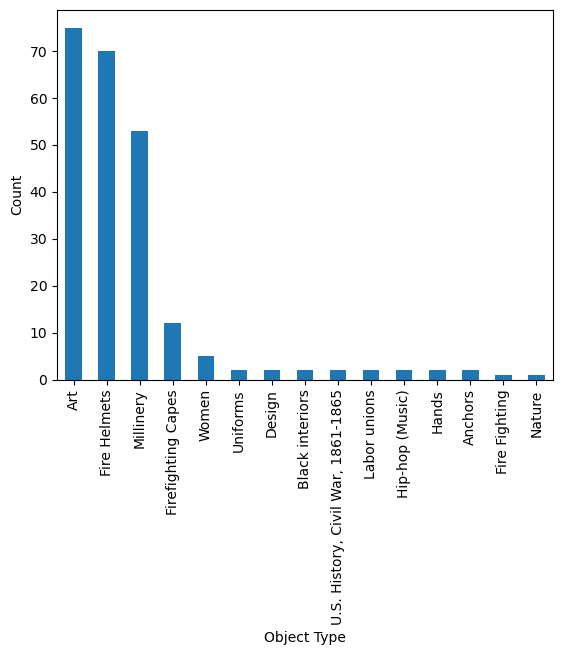

In [35]:
# show a bar plot of object_type_counts but filter out "Fire Helmets"

topic_counts = df_hats['topic'].value_counts().head(15)
topic_counts[0:].plot(kind='bar')
plt.xlabel('Object Type')
plt.ylabel('Count')
# plt.title('Top 5 Object Types')
plt.show()


In [3]:
import pandas as pd

# Load the JSON file into a DataFrame
df_wMus = pd.read_json('hats_wMus.json')

# Display the head of the DataFrame
print(df_wMus.head())

                                  id            title recordLink  \
0  ld1-1643398853934-1643398854399-1              hat              
1  ld1-1643399055209-1643399077810-0  Hat, Camouflage              
2  ld1-1643399055209-1643399073337-0         pin, hat              
3  ld1-1643399414441-1643399458827-0              hat              
4  ld1-1643399414441-1643399470078-1              hat              

                            dataSource media  \
0  National Museum of American History    []   
1  National Museum of American History    []   
2  National Museum of American History    []   
3  National Museum of American History    []   
4  National Museum of American History    []   

                                            freetext  \
0  {'creditLine': ['Gift of Mrs. James M. Doubled...   
1  {'creditLine': ['Edward Rubin and Rubin Brothe...   
2  {'creditLine': ['National Yeoman (F) Associati...   
3  {'creditLine': ['Roberta A. McAllister'], 'dat...   
4  {'creditLine': ['Ma

In [7]:
# Create df_wMus_clean by filtering out rows with missing 'media' OR recordLink. Note that it may be NaN, empty, or two brackets with nothing in it, i.e. '[]'

df_wMus_clean = df_wMus[(df_wMus['media'].apply(lambda x: len(x) > 0)) & (df_wMus['recordLink'].apply(lambda x: x != '[]'))]


In [8]:
# Extract keys from the 'freetext' column and create new columns
freetext_keys = ['creditLine', 'date', 'notes', 'physicalDescription']

for key in freetext_keys:
    df_wMus_clean[key] = df_wMus_clean['freetext'].apply(lambda x: x.get(key, [None])[0])

# Extract keys from the 'indexedStructured' column and create new columns
indexed_keys = ['date', 'object_type', 'topic']

for key in indexed_keys:
    df_wMus_clean[key] = df_wMus_clean['indexedStructured'].apply(lambda x: x.get(key, [None])[0] if x.get(key) else None)

# Display the head of the updated DataFrame
print(df_wMus_clean.head())


                                   id                               title  \
52  ld1-1643399134763-1643399189184-0          Hope Hose Company Fire Hat   
53  ld1-1643399134763-1643399189170-0     Good Will Fire Company Fire Hat   
54  ld1-1643399134763-1643399189207-0  Pennsylvania Hose Company Fire Hat   
55  ld1-1643399134763-1643399189245-0         Union Fire Company Fire Hat   
56  ld1-1643399134763-1643399189147-0      Columbia Hose Company Fire Hat   

   recordLink                           dataSource  \
52             National Museum of American History   
53             National Museum of American History   
54             National Museum of American History   
55             National Museum of American History   
56             National Museum of American History   

                                                media  \
52  [https://ids.si.edu/ids/deliveryService?id=NMA...   
53  [https://ids.si.edu/ids/deliveryService?id=NMA...   
54  [https://ids.si.edu/ids/deliveryServi

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_19724/381834225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wMus_clean[key] = df_wMus_clean['freetext'].apply(lambda x: x.get(key, [None])[0])
/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_19724/381834225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wMus_clean[key] = df_wMus_clean['freetext'].apply(lambda x: x.get(key, [None])[0])
/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_19724/381834225.py:5: Setti

In [9]:
# Filter rows where 'object_type' contains "hat" (case insensitive)
df_wMus_clean = df_wMus_clean[df_wMus_clean['object_type'].str.contains('hat', case=False, na=False)]

# Display the head of the filtered DataFrame
print(df_wMus_clean.head())

                                   id                               title  \
52  ld1-1643399134763-1643399189184-0          Hope Hose Company Fire Hat   
53  ld1-1643399134763-1643399189170-0     Good Will Fire Company Fire Hat   
54  ld1-1643399134763-1643399189207-0  Pennsylvania Hose Company Fire Hat   
55  ld1-1643399134763-1643399189245-0         Union Fire Company Fire Hat   
56  ld1-1643399134763-1643399189147-0      Columbia Hose Company Fire Hat   

   recordLink                           dataSource  \
52             National Museum of American History   
53             National Museum of American History   
54             National Museum of American History   
55             National Museum of American History   
56             National Museum of American History   

                                                media  \
52  [https://ids.si.edu/ids/deliveryService?id=NMA...   
53  [https://ids.si.edu/ids/deliveryService?id=NMA...   
54  [https://ids.si.edu/ids/deliveryServi

In [10]:
# Concatenate all values in the 'physicalDescription' column into a single text string
physical_description_text = ' '.join(df_wMus_clean['physicalDescription'].dropna().astype(str).tolist())

# Display the resulting text string
with open('physical_description_text.txt', 'w') as file:
    file.write(physical_description_text)

In [12]:
import numpy as np
import re

# Define the mapping of materials to their respective categories
material_to_category = {
    # 1. Leather
    "leather": "Leather",
    "patent leather": "Leather",
    
    # 2. Painted Finishes
    "painted": "Painted Finishes",
    "paint": "Painted Finishes",
    "metallic paint": "Painted Finishes",
    "synthetic dye": "Painted Finishes",
    "natural dye": "Painted Finishes",
    
    # 3. Fabrics and Felts
    "fabric, pressed felt": "Fabrics and Felts",
    "wool felt": "Fabrics and Felts",
    "mohair": "Fabrics and Felts",
    "velvet": "Fabrics and Felts",
    "velveteen": "Fabrics and Felts",
    "silk": "Fabrics and Felts",
    "cotton": "Fabrics and Felts",
    "flannel": "Fabrics and Felts",
    "twill": "Fabrics and Felts",
    "canvas": "Fabrics and Felts",
    "damask": "Fabrics and Felts",
    "faille": "Fabrics and Felts",
    "satin acetate": "Fabrics and Felts",
    "organza": "Fabrics and Felts",
    "brocade": "Fabrics and Felts",
    "satin and running stitches on machine-made net": "Fabrics and Felts",
    "interfacing": "Fabrics and Felts",
    "muslin": "Fabrics and Felts",
    "linen": "Fabrics and Felts",
    "cellulose acetate": "Fabrics and Felts",
    
    # 4. Metals and Wire
    "metal wire": "Metals and Wire",
    "metal": "Metals and Wire",
    "wire": "Metals and Wire",
    "metallic thread": "Metals and Wire",
    "metal aglets": "Metals and Wire",
    "metallic components": "Metals and Wire",
    "metal and silk": "Metals and Wire",
    
    # 5. Synthetic Materials
    "synthetic fiber": "Synthetic Materials",
    "synthetic silk": "Synthetic Materials",
    "nylon net": "Synthetic Materials",
    "polyester velveteen": "Synthetic Materials",
    "polypropylene": "Synthetic Materials",
    "synthetic satin": "Synthetic Materials",
    "synthetic velour": "Synthetic Materials",
    "synthetic raffia": "Synthetic Materials",
    "synthetic cellulose": "Synthetic Materials",
    "plastic": "Synthetic Materials",
    "synthetic dye": "Synthetic Materials",
    "synthetic velveteen": "Synthetic Materials",
    
    # 6. Ribbons and Trims
    "petersham rayon ribbon": "Ribbons and Trims",
    "petersham cotton ribbon": "Ribbons and Trims",
    "grosgrain ribbon": "Ribbons and Trims",
    "satin ribbon": "Ribbons and Trims",
    "taffeta": "Ribbons and Trims",
    "chenille": "Ribbons and Trims",
    "velvet ribbon": "Ribbons and Trims",
    "ribbon blends": "Ribbons and Trims",
    "cord": "Ribbons and Trims",
    
    # 7. Natural Fibers and Straw
    "straw": "Natural Fibers and Straw",
    "synthetic straw": "Natural Fibers and Straw",
    "raffia": "Natural Fibers and Straw",
    "straw with feathers": "Natural Fibers and Straw",
    "floral wire": "Natural Fibers and Straw",
    
    # 8. Embellishments and Adhesives
    "rhinestones": "Embellishments and Adhesives",
    "sequins": "Embellishments and Adhesives",
    "beads": "Embellishments and Adhesives",
    "glitter": "Embellishments and Adhesives",
    "glue": "Embellishments and Adhesives",
    "adhesive": "Embellishments and Adhesives",
    "hot-melt adhesive": "Embellishments and Adhesives",
    "plastic sequins": "Embellishments and Adhesives",
    "imitation pearl beads": "Embellishments and Adhesives",
}



In [13]:
# Sort materials by length in descending order to prioritize longer matches
sorted_materials = sorted(material_to_category.keys(), key=lambda x: len(x), reverse=True)

In [14]:
def assign_material_category(description):
    """
    Assigns the first matching material's category to the description.
    
    Parameters:
    - description (str): The physical description text.
    
    Returns:
    - str: The corresponding category name or NaN if no match is found.
    """
    if pd.isnull(description):
        return np.nan
    
    description_lower = description.lower()
    for material in sorted_materials:
        # Use regex to match whole words or phrases to avoid partial matches
        # Escape special regex characters in material names
        pattern = r'\b' + re.escape(material.lower()) + r'\b'
        if re.search(pattern, description_lower):
            return material_to_category[material]
    return np.nan  # Return NaN if no material is found

In [15]:
# Apply the function to assign categories
df_wMus_clean['material_1'] = df_wMus_clean['physicalDescription'].apply(assign_material_category)

NameError: name 'plt' is not defined

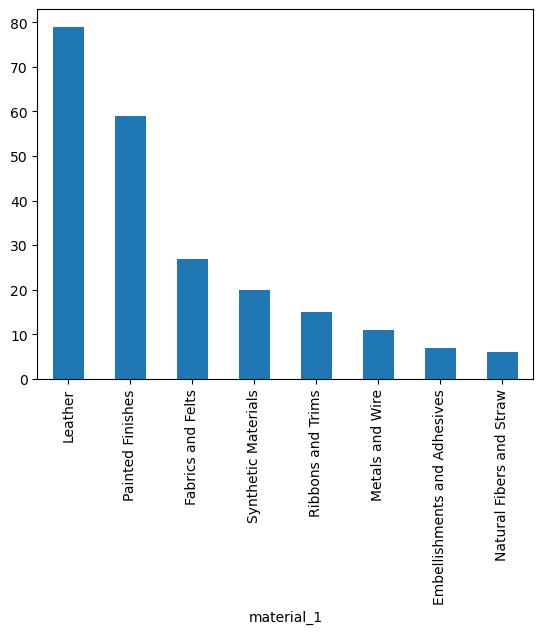

In [16]:
# display plot of material_1 frequencies
material_counts = df_wMus_clean['material_1'].value_counts().head(10)
material_counts.plot(kind='bar')
plt.xlabel('Material Category')
plt.ylabel('Count')
plt.title('Top 10 Material Categories')
plt.show()

In [17]:
# Show all phsyicalDescriptions for missing material_1
missing_materials = df_wMus_clean[df_wMus_clean['material_1'].isnull()]['physicalDescription']
print(missing_materials)

55                                   black (overall color)
1441                                  blue (overall color)
1714                                 black (overall color)
4223                                                  wool
5383                               green (underbrim color)
6909                                 yarn: Acrylic (fiber)
9573                               Silver, imitation stone
9574                                         Glass, silver
10206                                                 wood
10207                                       dye and wicker
10848                                               wicker
12000                                  red (overall color)
15285    overall: 7 3/4 in x 7 in x 8 1/2 in; 19.685 cm...
15457                               maroon (overall color)
15501                      pressed felt (overall material)
15823                                 natural fiber, cloth
Name: physicalDescription, dtype: object


In [18]:
# for each missing_materials in df_wMus_clean update materials_1 with the following:
# if 'black (overall color)', ' blue (overall color)', 'green (underbrim color)', 'red (overall color)', 'maroon (overall color)' label as 'Painted Finishes'
# if 'wool', yarn: Acrylic (fiber) label as 'Fabrics and Felts'
# if Silver, imitation stone, 'Glass, silver' label as 'Metals and Wire'
# if 'wood', 'dye and wicker', 'wicker', ' pressed felt (overall material)', 'natural fiber, cloth' label as 'Natural Fibers and Straw'

# Update the 'material_1' column based on the conditions

df_wMus_clean.loc[missing_materials.index, 'material_1'] = df_wMus_clean.loc[missing_materials.index, 'physicalDescription'].apply(lambda x: 'Painted Finishes' if 'black (overall color)' in x or 'blue (overall color)' in x or 'green (underbrim color)' in x or 'red (overall color)' in x or 'maroon (overall color)' in x else x)
df_wMus_clean.loc[missing_materials.index, 'material_1'] = df_wMus_clean.loc[missing_materials.index, 'physicalDescription'].apply(lambda x: 'Fabrics and Felts' if 'wool' in x or 'yarn: Acrylic (fiber)' in x else x)
df_wMus_clean.loc[missing_materials.index, 'material_1'] = df_wMus_clean.loc[missing_materials.index, 'physicalDescription'].apply(lambda x: 'Metals and Wire' if 'Silver' in x or 'imitation stone' in x or 'Glass, silver' in x else x)
df_wMus_clean.loc[missing_materials.index, 'material_1'] = df_wMus_clean.loc[missing_materials.index, 'physicalDescription'].apply(lambda x: 'Natural Fibers and Straw' if 'wood' in x or 'dye and wicker' in x or 'wicker' in x or 'pressed felt (overall material)' in x or 'natural fiber, cloth' in x else x)


In [19]:
!pip install requests Pillow matplotlib numpy

In [20]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# The provided image URL
image_url = "https://ids.si.edu/ids/deliveryService?id=NMAAHC-2007_3_549_001"

In [22]:
def download_image(url):
    """
    Downloads an image from a URL.

    Parameters:
    - url (str): The URL of the image.

    Returns:
    - Image object if successful, else None.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Attempt to open the image
        img = Image.open(BytesIO(response.content))
        return img

    except requests.exceptions.RequestException as e:
        print(f"HTTP Request failed: {e}")
    except IOError:
        print("Failed to parse image.")
    
    return None

# Download the image
image = download_image(image_url)

if image:
    print("Image downloaded successfully.")
else:
    print("Failed to download the image.")

Image downloaded successfully.


In [32]:
def analyze_hue_saturation(image):
    """
    Analyzes the hue and saturation of an image.

    Parameters:
    - image (PIL.Image): The image to analyze.

    Returns:
    - Tuple containing average hue and average saturation.
    """
    # Ensure image is in RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Convert image to HSV
    hsv_image = image.convert('HSV')
    hsv_array = np.array(hsv_image)

    # Split into Hue, Saturation, and Value channels
    hue = hsv_array[:, :, 0]
    saturation = hsv_array[:, :, 1]
    value = hsv_array[:, :, 2]

    # Calculate average hue and saturation
    avg_hue = np.mean(hue)
    avg_saturation = np.mean(saturation)

    # For better interpretability, scale hue to degrees (0-360) and saturation to percentage (0-100)
    avg_hue_degrees = (avg_hue / 255) * 360
    avg_saturation_percent = (avg_saturation / 255) * 100

    return avg_hue_degrees, avg_saturation_percent, hue, saturation

# avg_hue_degrees, avg_saturation_percent, hue_channel, saturation_channel = analyze_hue_saturation(image)


print(f"Average Hue (degrees): {avg_hue_degrees}")
print(f"Average Saturation (%): {avg_saturation_percent}")





Average Hue (degrees): 85.89352014474207
Average Saturation (%): 3.7827933453951723
85.89352014474207
3.7827933453951723


In [41]:
# The provided image URL
image_url1 = "https://ids.si.edu/ids/deliveryService?id=NMAH-AHB2006q05158"

def download_image(url):
    """
    Downloads an image from a URL.

    Parameters:
    - url (str): The URL of the image.

    Returns:
    - Image object if successful, else None.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Attempt to open the image
        img = Image.open(BytesIO(response.content))
        return img

    except requests.exceptions.RequestException as e:
        print(f"HTTP Request failed: {e}")
    except IOError:
        print("Failed to parse image.")
    
    return None


# Download the image
image = download_image(image_url1)

print("success" if image else "failed")

if image:
    print("Image downloaded successfully.")
else:
    print("Failed to download the image.")

def analyze_hue_saturation(image):
    """
    Analyzes the hue and saturation of an image.

    Parameters:
    - image (PIL.Image): The image to analyze.

    Returns:
    - Tuple containing average hue and average saturation.
    """
    # Ensure image is in RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Convert image to HSV
    hsv_image = image.convert('HSV')
    hsv_array = np.array(hsv_image)

    # Split into Hue, Saturation, and Value channels
    hue = hsv_array[:, :, 0]
    saturation = hsv_array[:, :, 1]
    value = hsv_array[:, :, 2]

    # Calculate average hue and saturation
    avg_hue = np.mean(hue)
    avg_saturation = np.mean(saturation)

    # For better interpretability, scale hue to degrees (0-360) and saturation to percentage (0-100)
    avg_hue_degrees = (avg_hue / 255) * 360
    avg_saturation_percent = (avg_saturation / 255) * 100

    return avg_hue_degrees, avg_saturation_percent, hue, saturation

# avg_hue_degrees, avg_saturation_percent, hue_channel, saturation_channel = analyze_hue_saturation(image)


print(f"Average Hue (degrees): {avg_hue_degrees}")
print(f"Average Saturation (%): {avg_saturation_percent}")

print(f"Image URL: {image_url1}")

success
Image downloaded successfully.
Average Hue (degrees): 85.89352014474207
Average Saturation (%): 3.7827933453951723
Image URL: https://ids.si.edu/ids/deliveryService?id=NMAH-AHB2006q05158


In [42]:
# in media column there is usually a list of URLs. I want to break these out into different columns. So the first instance is media1, media2, etc.
# in each list each URL is separated by a comma. I want to split these out into different columns. So the first instance is media1, media2, etc.
# Each URL also has '' around it. I want to remove these.
# I want to do this for the df_wMus_clean DataFrame

# Create a new DataFrame to store the split URLs
df_media_split = df_wMus_clean['media'].apply(lambda x: pd.Series(x))

# Rename the columns to 'media1', 'media2', etc.
df_media_split.columns = [f'media{i+1}' for i in range(df_media_split.shape[1])]
df_media_split = df_media_split.replace('', np.nan)

# Remove the single quotes around the URLs
df_media_split = df_media_split.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)

# Concatenate the split URLs with the original DataFrame
df_wMus_clean = pd.concat([df_wMus_clean, df_media_split], axis=1)

# Display the head of the updated DataFrame
print(df_wMus_clean.head())


                                   id                               title  \
52  ld1-1643399134763-1643399189184-0          Hope Hose Company Fire Hat   
53  ld1-1643399134763-1643399189170-0     Good Will Fire Company Fire Hat   
54  ld1-1643399134763-1643399189207-0  Pennsylvania Hose Company Fire Hat   
55  ld1-1643399134763-1643399189245-0         Union Fire Company Fire Hat   
56  ld1-1643399134763-1643399189147-0      Columbia Hose Company Fire Hat   

   recordLink                           dataSource  \
52             National Museum of American History   
53             National Museum of American History   
54             National Museum of American History   
55             National Museum of American History   
56             National Museum of American History   

                                                media  \
52  [https://ids.si.edu/ids/deliveryService?id=NMA...   
53  [https://ids.si.edu/ids/deliveryService?id=NMA...   
54  [https://ids.si.edu/ids/deliveryServi

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_19724/2812793284.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_media_split = df_media_split.applymap(lambda x: x.strip("'") if isinstance(x, str) else x)


In [46]:
import time
import os

# Ensure the "images" directory exists
os.makedirs('images', exist_ok=True)

# Iterate through each row in the DataFrame
for index, row in df_wMus_clean.iterrows():
    image_url = row['media1']
    image_id = row['id']

    # Download the image
    image = download_image(image_url)

    # Save the image to a file
    if image:
        image.save(f'images/{image_id}.jpg')
        print(f"Image {image_id} saved successfully.")
    
    # Wait for 0.5 seconds before downloading the next image
    time.sleep(0.5)


Image ld1-1643399134763-1643399189184-0 saved successfully.
Image ld1-1643399134763-1643399189170-0 saved successfully.
HTTP Request failed: HTTPSConnectionPool(host='ids.si.edu', port=443): Max retries exceeded with url: /ids/deliveryService?id=NMAH-AHB2006q05164 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x33c181130>, 'Connection to ids.si.edu timed out. (connect timeout=None)'))
Image ld1-1643399134763-1643399189245-0 saved successfully.
HTTP Request failed: HTTPSConnectionPool(host='ids.si.edu', port=443): Max retries exceeded with url: /ids/deliveryService?id=NMAH-AHB2006q05043 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x342047e30>, 'Connection to ids.si.edu timed out. (connect timeout=None)'))
Image ld1-1643399134763-1643399189222-0 saved successfully.
Image ld1-1643399134763-1643399189261-0 saved successfully.
Image ld1-1643399134763-1643399189188-0 saved successfully.
Image ld1-1643399134763-1643399189219-0 sa

KeyboardInterrupt: 